In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['MAN', 'MAN']
di_sugar2= ['DManpa', 'DManpa']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 44 
valid torsion1 and torsion2: (44, 44)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['6.C', '5.C'], ['4C1', 'B14'])
(['5.C', '4.C'], ['B14', '-'])
(['4.C', '3.C'], ['-', '-'])
(['4.K', '3.K'], ['1S3', '-'])
(['5.D', '4.D'], ['14B', '4C1'])
(['6.D', '4.D'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '1C4'])
(['6.C', '4.C'], ['-', '1C4'])
(['4.E', '3.E'], ['4C1', '-'])
(['6.C', '5.C'], ['4C1', '-'])
(['5.C', '4.C'], ['-', '-'])
(['4.C', '3.C'], ['-', 'OH1'])
(['4.D', '3.D'], ['4C1', '4C1'])
(['6.D', '5.D'], ['-', '-'])
(['6.F', '5.F'], ['BO3', '4C1'])
(['5.F', '4.F'], ['4C1', '4C1'])
(['5.E', '4.E'], ['4C1', '4C1'])
(['6.C', '5.C'], ['-', '3S1'])
(['5.C', '4.C'], ['3S1', '4C1'])
(['2.D', '1.D'], ['4C1', '-'])
(['5.C', '4.C'], ['-', '-'])
(['7.E', '6.E'], ['-', '-'])
(['4.S', '3.S'], ['4C1', '4C1'])
(['6.D', '5.D'], ['-', 'O3B'])
(['5.D', '4.D'], ['O3B', '4C1'])
(['4.D', '3.D'], ['4C1', '-'])
(['4.C', '3.C'], ['-', '14B'])
(['6.C', '5.C'], ['-', '-'])
(['5.C', '4.C'], ['-', '4C1'])
(['4.B', '3.B'], ['-', '4C1'])
(['4.E', '3.E'], ['4C1', '4C1'])
(['4.D', '3.D'], ['BO3', 'B

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2ds9.pdb C MAN 6 C1
../../pdbs//2ds9.pdb C MAN 5 O4
2707 2704
Connection found between 2707 and 2704
../../pdbs//2ds9.pdb C MAN 5 C1
../../pdbs//2ds9.pdb C MAN 4 O4
2696 2693
Connection found between 2696 and 2693
../../pdbs//2ds9.pdb C MAN 4 C1
../../pdbs//2ds9.pdb C MAN 3 O4
2685 2682
Connection found between 2685 and 2682
../../pdbs//4z7v.pdb K MAN 4 C1
../../pdbs//4z7v.pdb K MAN 3 O4
12646 12643
Connection found between(2) 12646 and 12643
../../pdbs//5lgj.pdb D MAN 5 C1
../../pdbs//5lgj.pdb D MAN 4 O4
4989 4986
No connection found between 4989 and 4986
4
../../pdbs//5lgj.pdb D MAN 6 C1
../../pdbs//5lgj.pdb D MAN 4 O4
5000 4986
Connection found between 5000 and 4986
../../pdbs//1sdx.pdb C MAN 5 C1
../../pdbs//1sdx.pdb C MAN 4 O4
2675 2672
No connection found between 2675 and 2672
6
../../pdbs//1sdx.pdb C MAN 6 C1
../../pdbs//1sdx.pdb C MAN 4 O4
2686 2672
Connection found between 2686 and 2672
../../pdbs//4e36.pdb E MAN 4 C1
../../pdbs//4e36.pdb E MAN 3 O4
14097 14094
Con

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2ds9.pdb,C MAN 6 C2 C1 MAN 5 O4 C4,C MAN 6 C1 MAN 5 O4 C4 C5,280.37300,293.78790,"([MAN(6_C_), MAN(5_C_)], [122.32, 115.22])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpa1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([6.C, 5.C], [4C1, B14])"
1,2ds9.pdb,C MAN 5 C2 C1 MAN 4 O4 C4,C MAN 5 C1 MAN 4 O4 C4 C5,115.67400,197.38600,"([MAN(5_C_), MAN(4_C_)], [115.22, 102.05])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpa1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([5.C, 4.C], [B14, -])"
2,2ds9.pdb,C MAN 4 C2 C1 MAN 3 O4 C4,C MAN 4 C1 MAN 3 O4 C4 C5,203.65300,241.20500,"([MAN(4_C_), MAN(3_C_)], [102.05, 84.79])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpa1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([4.C, 3.C], [-, -])"
3,4z7v.pdb,K MAN 4 C2 C1 MAN 3 O4 C4,K MAN 4 C1 MAN 3 O4 C4 C5,65.38220,214.56700,"([MAN(4_K_), MAN(3_K_)], [152.59, 145.84])",FUC(6_K_)-[MAN(4_K_)-MAN(3_K_)-NAG(2_K_)]-[FUC...,DManpa1-4DManpa1-4DGlcpNAcb1-4[LFucpa1-6][LFuc...,"([4.K, 3.K], [1S3, -])"
4,5lgj.pdb,D MAN 6 C2 C1 MAN 4 O4 C4,D MAN 6 C1 MAN 4 O4 C4 C5,197.80900,219.81000,"([MAN(6_D_), MAN(4_D_)], [112.99, 101.08])",MAN(6_D_)-[MAN(5_D_)]-MAN(4_D_)-[MAN(7_D_)]-BM...,DManpa1-3[DManpa1-4]DManpa1-6[DManpa1-3]DManpb...,"([6.D, 4.D], [4C1, 4C1])"
5,1sdx.pdb,C MAN 6 C2 C1 MAN 4 O4 C4,C MAN 6 C1 MAN 4 O4 C4 C5,40.53810,249.89800,"([MAN(6_C_), MAN(4_C_)], [97.99, 98.1])",MAN(6_C_)-[MAN(5_C_)]-MAN(4_C_)-BMA(3_C_)-NDG(...,DManpb1-3[DManpa1-4]DManpa1-4DManpb1-4DGlcpNAc...,"([6.C, 4.C], [-, 1C4])"
6,4e36.pdb,E MAN 4 C2 C1 MAN 3 O4 C4,E MAN 4 C1 MAN 3 O4 C4 C5,108.94400,132.92800,"([MAN(4_E_), MAN(3_E_)], [118.33, 97.32])",MAN(4_E_)-MAN(3_E_)-NAG(2_E_)-NAG(1_E_)-ASN(85...,DManpa1-4DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([4.E, 3.E], [4C1, -])"
7,3ib1.pdb,C MAN 6 C2 C1 MAN 5 O4 C4,C MAN 6 C1 MAN 5 O4 C4 C5,179.45100,235.14100,"([MAN(6_C_), MAN(5_C_)], [122.07, 116.31])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpb1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([6.C, 5.C], [4C1, -])"
8,3ib1.pdb,C MAN 5 C2 C1 MAN 4 O4 C4,C MAN 5 C1 MAN 4 O4 C4 C5,18.18830,173.20700,"([MAN(5_C_), MAN(4_C_)], [116.31, 107.33])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpb1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([5.C, 4.C], [-, -])"
9,3ib1.pdb,C MAN 4 C2 C1 MAN 3 O4 C4,C MAN 4 C1 MAN 3 O4 C4 C5,205.30700,255.30500,"([MAN(4_C_), MAN(3_C_)], [107.33, 92.72])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-MAN(3_C_)-NAG(2_...,DManpb1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([4.C, 3.C], [-, OH1])"


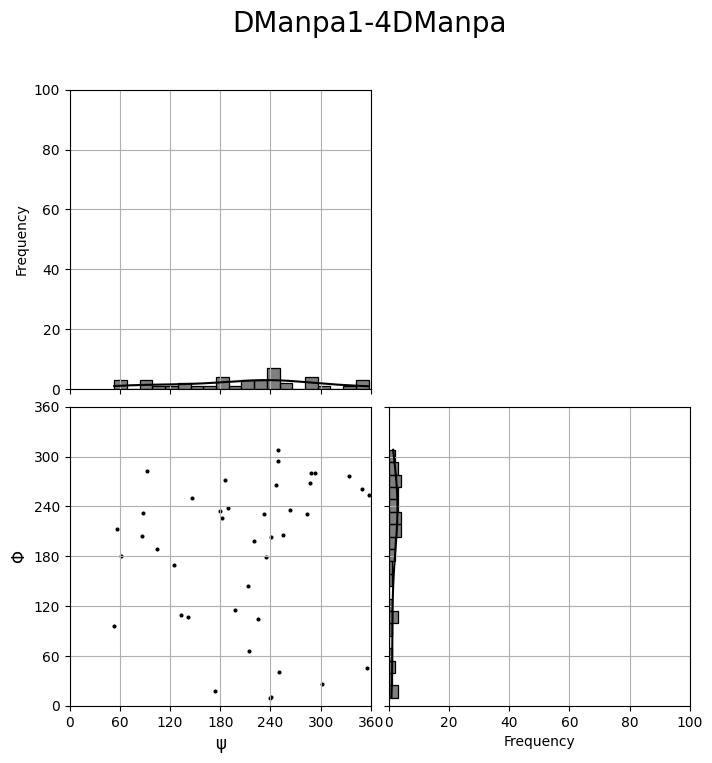

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)